# Loan Approval Prediction

### About The Dataset

The project's objective is to assess a range of customers attributes, including income, credit history, genders, socio-economic classes, and others, in order to make predictions about their chances to have a loan . The dataset used in this analysis was obtained from Kaggle and consists of 614 rows and 13 columns. Within these columns, there are 12 predictor variables and one target variable, namely the 'Loan_Status' column.

#### Data Dictionary
|Variable|Definition|
|--------|----------|
|Gender |Male/Female|
|Married | Marital Status|
|Dependents |Number of dependents|
|Education |Education level|
|Self_Employed |Employment Situation|
|ApplicantIncome |Level of applicant income|
|CoapplicantIncome |Coapplicant income|
|LoanAmount|amount of loan|
|Loan_Amount_Term|amount term|
|Credit_History|Credit history|
|Property_Area|Property_Area|
|Loan_Status|the status of the loan|


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\maram\Downloads\Loan_Train.csv")
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.shape

(614, 13)

In [5]:
data.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [6]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


### Data Cleaning

In [7]:
data.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
data.drop('Loan_ID', axis=1, inplace=True)

In [9]:
#Imputation with Median for numerical variables
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

In [10]:
##Imputation with mode for categorical variables
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [11]:
data.isna().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

### Exploratory Data Analysis 

In [12]:
import seaborn as sns 

In [13]:
data.columns.values

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

#### Gender

Text(0.5, 1.0, 'Number of Male/Female')

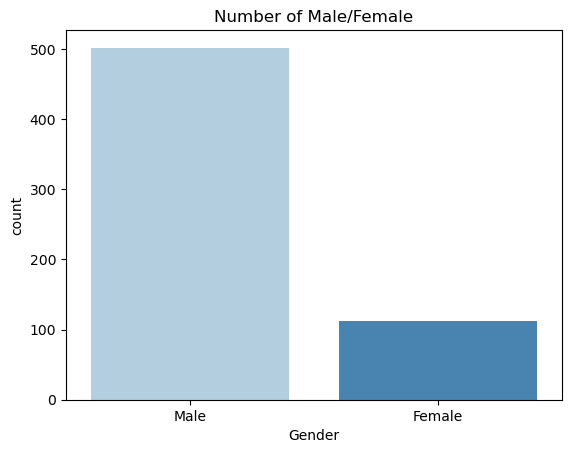

In [14]:
sns.countplot(x='Gender',data=data,palette='Blues').set_title('Number of Male/Female')

From the countplot figure, it can be concluded that there is a greater representation of males compared to females in the dataset.

#### Marital Status

Text(0.5, 1.0, 'Number of Married People')

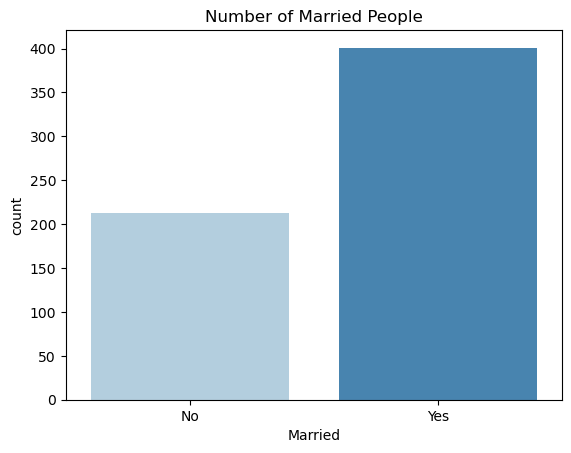

In [15]:
sns.countplot(x='Married',data=data,palette='Blues').set_title('Number of Married People')

Based on the countplot visualization, it's evident that the dataset predominantly consists of individuals who are married, outnumbering those who are not married.

#### Dependents

The number of dependents is often considered by lenders when evaluating loan applications. Lenders typically assess an applicant's financial stability and ability to repay the loan. Having more dependents might impact your disposable income, which could affect your ability to meet loan repayment obligations. Lenders may take this into account when determining your eligibility for a loan .


Text(0.5, 1.0, 'Number of Dependents')

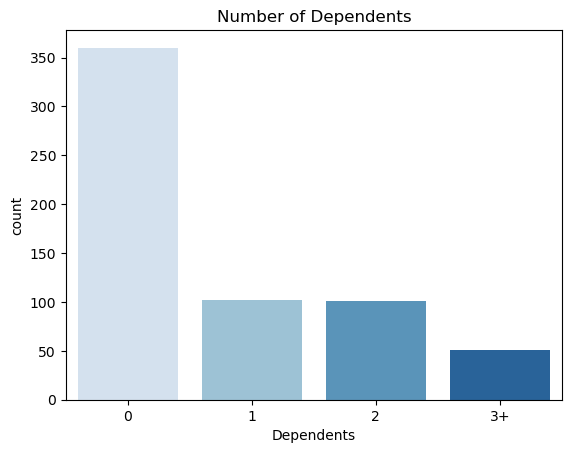

In [16]:
sns.countplot(x='Dependents',data=data,palette='Blues').set_title('Number of Dependents')

##### Hypothesis: 
In this analysis, we will posit that an increase in the number of dependents will have a significant impact on an individual's likelihood of obtaining a loan.

#### Education VS Income (Applicant/CoApplicant)

In [17]:
data.columns.values

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

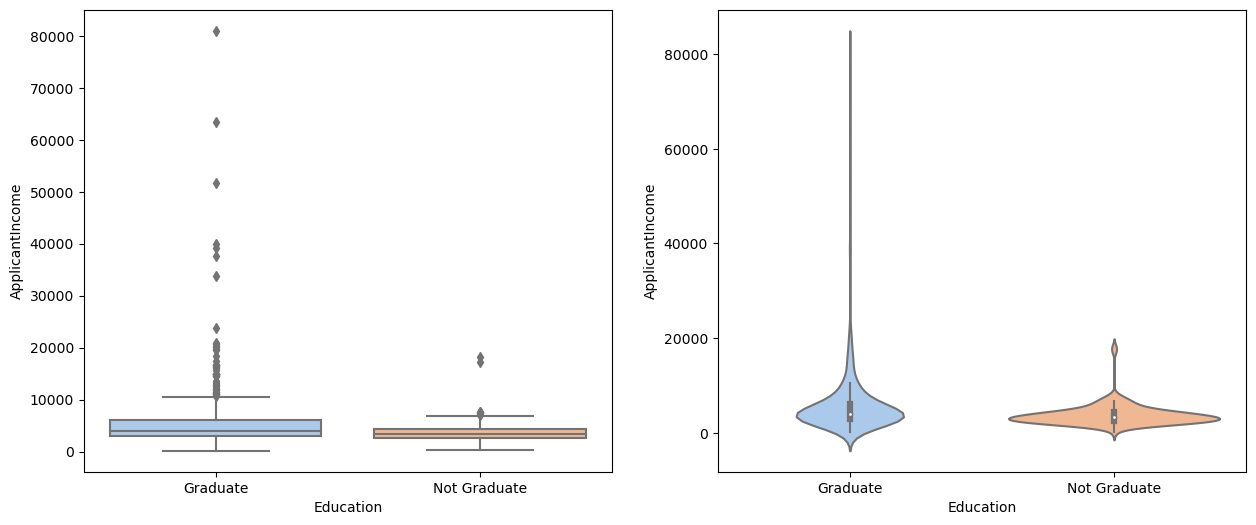

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.boxplot(x='Education',y='ApplicantIncome',data=data,ax=ax[0],palette='pastel')
sns.violinplot(x='Education',y='ApplicantIncome',data=data,ax=ax[1],palette='pastel')

Based on the insights drawn from the violin plot, we can observe that while the medians appear to be approximately equal for the graduate and non-graduate groups, the distribution shapes exhibit notable distinctions. Specifically, the distribution for the graduate group follows a normal distribution pattern, whereas the distribution for the non-graduate group appears to be relatively flat.

<Axes: xlabel='Education', ylabel='CoapplicantIncome'>

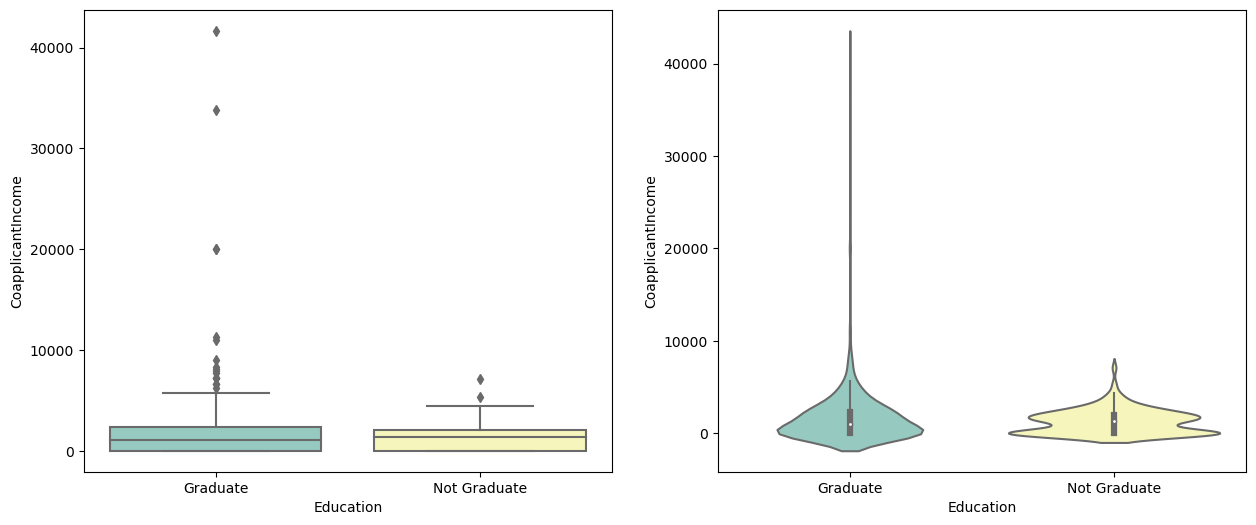

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.boxplot(x='Education',y='CoapplicantIncome',data=data,ax=ax[0],palette='Set3')
sns.violinplot(x='Education',y='CoapplicantIncome',data=data,ax=ax[1],palette='Set3')

Analyzing the violin plot, it becomes evident that the medians are roughly equivalent for both the graduate and non-graduate groups. However, there are significant disparities in the distribution shapes. In particular, the distribution for the graduate group appears right-skewed, while the non-graduate group's distribution displays a bimodal pattern with two distinct peaks

#### Education VS Self_Employed

Text(0.5, 1.0, 'Self Employed')

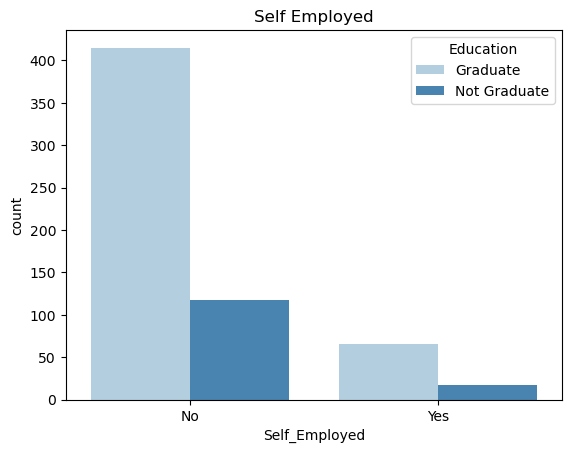

In [22]:
sns.countplot(x='Self_Employed', data = data,hue='Education',palette='Blues').set_title('Self Employed')

we can deduce that a larger proportion of individuals in both the graduate and non-graduate groups are not self-employed as compared to those who are self-employed.

#### Education VS Property_Area

Text(0.5, 1.0, 'Self Employed')

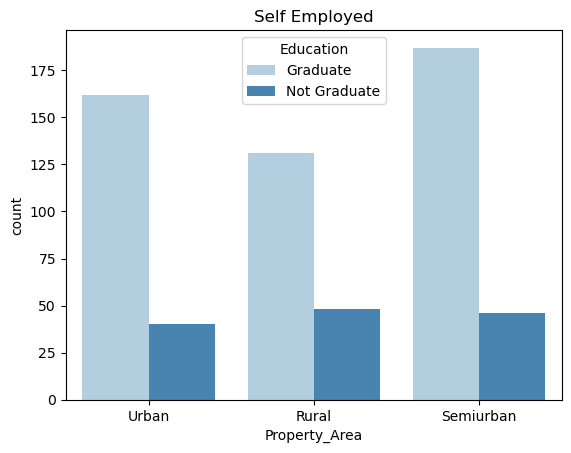

In [23]:
sns.countplot(x='Property_Area', data = data,hue='Education',palette='Blues').set_title('Self Employed')

We can conclude that the proportion of graduates is highest in semi-urban areas, followed by urban areas, with the lowest proportion in rural areas. Conversely, the percentage of non-graduates is highest in rural areas, followed by semi-urban areas, and lowest in urban areas.

#### Credit History VS Income

C:\Users\maram\AppData\Local\Temp\ipykernel_21172\1622755085.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Credit_History', y='ApplicantIncome', data=data, palette='coolwarm')
C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


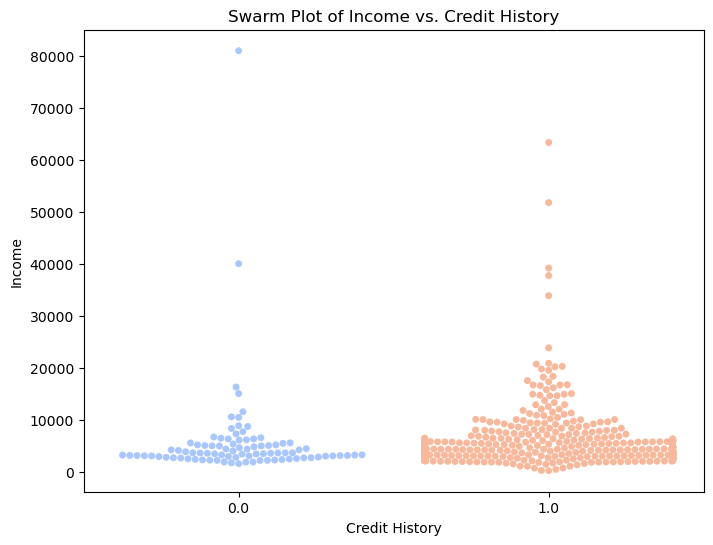

In [24]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Credit_History', y='ApplicantIncome', data=data, palette='coolwarm')
plt.xlabel('Credit History')
plt.ylabel('Income')
plt.title('Swarm Plot of Income vs. Credit History')
plt.show()

From the information gathered from the swarm plot, it's clear that the income density is higher for individuals with a credit history equal to 1 as compared to those with a credit history equal to 0.

#### Loan Amount VS Loan term

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

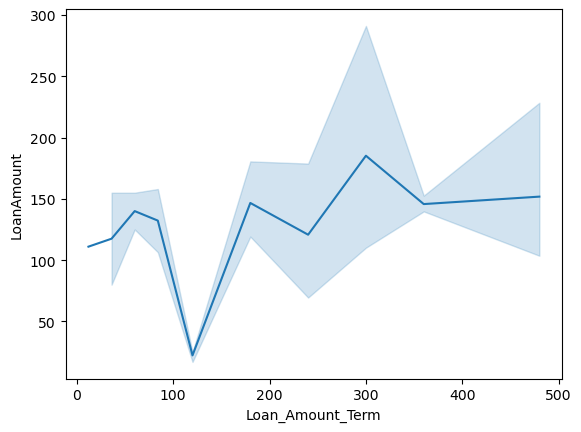

In [25]:
sns.lineplot(y='LoanAmount',x='Loan_Amount_Term',data=data)

Based on the observations derived from the line plot, it can be inferred that as the loan term exceeds 100, there is a noticeable increase in the loan amounts.

#### Loan_Status VS Credit_History

<Axes: xlabel='Credit_History', ylabel='count'>

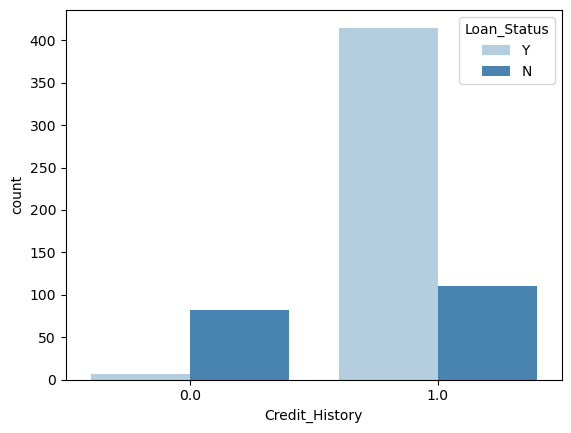

In [28]:
sns.countplot(x='Credit_History', data=data, palette='Blues',hue='Loan_Status')

The countplot reveals a significantly greater number of approvals for individuals with a credit history equal to one in comparison to those with a credit history equal to zero. This suggests that credit history is a crucial factor in predicting loan status.

#### Loan_Status VS ApplicantIncome

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

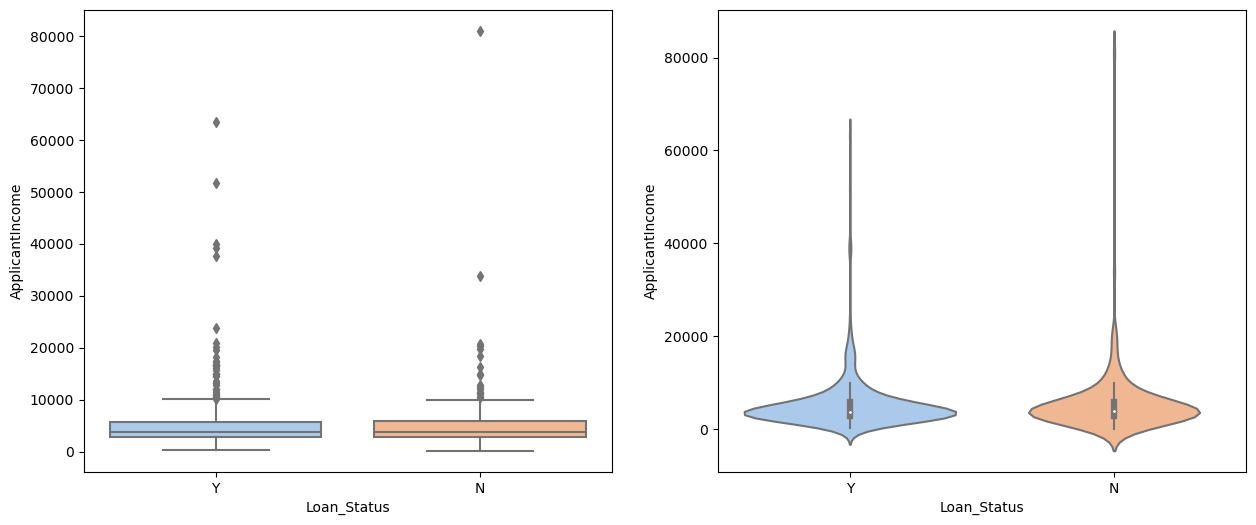

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=data,ax=ax[0],palette='pastel')
sns.violinplot(x='Loan_Status',y='ApplicantIncome',data=data,ax=ax[1],palette='pastel')

The box and violin plots indicate that the shape of the distribution and the mean are roughly comparable for both accepted and rejected loans. However, it is noteworthy that the distribution for accepted loans appears to be more extended than that of rejected loans, with a normal-like shape.

#### Loan_Status VS Dependents

Text(0.5, 1.0, 'Number of Dependents')

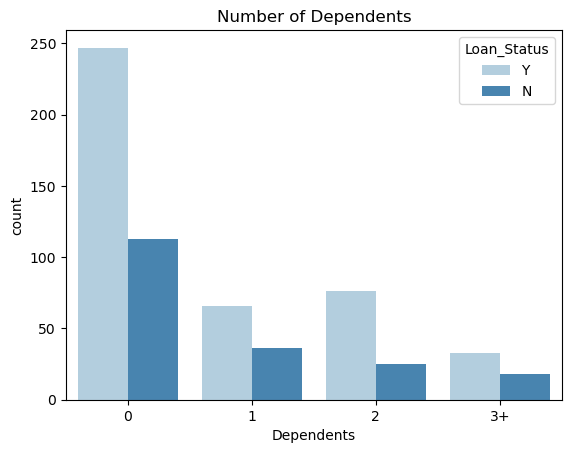

In [31]:
sns.countplot(x='Dependents',data=data,palette='Blues',hue='Loan_Status').set_title('Number of Dependents')


A lower count of dependents correlates with an increased likelihood of loan approval.







#### Loan_Status VS Property_Area

Text(0.5, 1.0, 'Property Area')

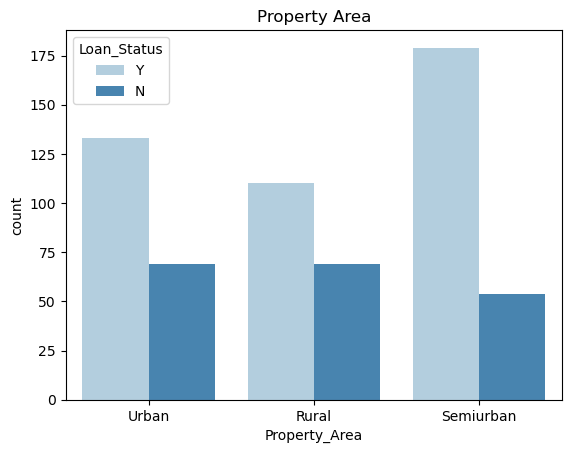

In [32]:
sns.countplot(x='Property_Area', data = data,hue='Loan_Status',palette='Blues').set_title('Property Area')

It can be inferred that individuals residing in semi-urban areas exhibit a greater likelihood of loan approval, followed by those in urban areas, while individuals in rural areas are less likely to have their loans approved. Conversely, individuals in rural and urban areas tend to face a higher likelihood of loan rejection.





#### Label Encoding the categorical variables

In [33]:
data.drop('Gender', axis=1, inplace=True)
data.drop('Married', axis=1, inplace=True)

In [35]:
# Label Encoding
data['Education'] = data['Education'].map({'Not Graduate':0, 'Graduate':1})
data['Self_Employed'] = data['Self_Employed'].map({'No':0, 'Yes':1})
data['Property_Area'] = data['Property_Area'].map({'Rural':0, 'Urban':1,'Semiurban':2})
data['Loan_Status'] = data['Loan_Status'].map({'N':0, 'Y':1})
data['Dependents'] = data['Dependents'].map({'0':0, '1':1,'2':1,'3+':3})

## Correlation Matrix Heatmap

In [36]:
corr=data.corr()

<Axes: >

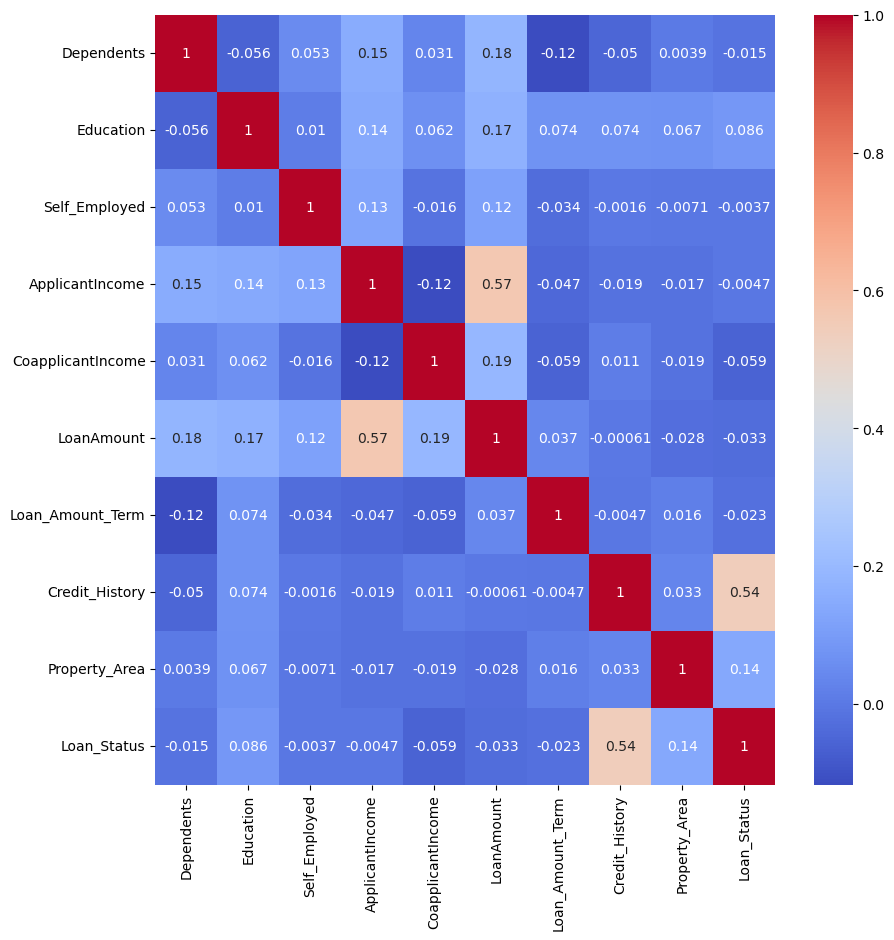

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

The correlation matrix reveals notable strong correlations in the dataset:

There is a strong positive correlation between Applicant Income and Loan Amount.

Additionally, there is a significant correlation between Credit History and Loan Approval.

These findings substantiate our earlier assumption that Credit History plays a crucial role in predicting whether a loan will be approved or not.





### Building the Model

In [38]:
data.columns.values

array(['Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'], dtype=object)

In [40]:
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'])

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
LG=LogisticRegression()

In [46]:
LG.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
LRpred=LG.predict(x_test)
LRpred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Decision Tree Model 

In [49]:
from sklearn.model_selection import train_test_split
x= data.drop(['Loan_Status'],axis =1)
y=data['Loan_Status']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [51]:
dtc.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [52]:
predicteddtc= dtc.predict(xTest)

In [53]:
print("Predicted Value:", predicteddtc)

Predicted Value: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 0 0 1 1 1]


#### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [58]:
rfc.fit(xTrain, yTrain)

RandomForestClassifier()

In [59]:
rfc_pred = rfc.predict(xTest)

In [60]:
print("Predicted Value:", rfc_pred)

Predicted Value: [1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 0 1 1 1]


#### Accuracy Report

In [67]:
# Logistic Regression
from sklearn import metrics

# Model Accuracy
print("Accuracy of Logistic Regression Model:",metrics.accuracy_score(y_test,LRpred))

Accuracy of Logistic Regression Model: 0.7642276422764228


In [68]:
# Decision Tree
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(yTest, predicteddtc))

Accuracy: 0.7154471544715447


In [69]:
# Random forest
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(yTest, rfc_pred))

Accuracy: 0.8699186991869918


## Conclusion 

Based on the findings from the exploratory data analysis, it is evident that the following factors significantly influence loan approval:
- Credit Histroy: People with Credit History score equal to 1 have higher chances of loan approval
- Number of Dependents: People with less number of dependents have higher chances of loan approval
- Income : People with higher Income have higher chnaces of high loans values .
- the income density is higher for individuals with a credit history equal to 1 as compared to those with a credit history equal to 0,which implies higher chances of having the loan.


The Random Forest model achieved the highest performance score when evaluated alongside Logistic Regression and Decsion Tree. Therefore, based on the results of our analysis, we can conclude that the Random Forest model is the most suitable choice for this specific dataset.